In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


# Import Dataset
First, we will import the dataset into a pandas dataframe to begin our analysis.

In [5]:
filename = "data.csv"
df = pd.read_csv(filename)

Let's have a look inside the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


We find that there are 21 features, of object, integer and float types.

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,1,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


We can see from the file that there are some columns that will not be of use to us, such as "customerID" and the index column. We will drop these columns. We will also drop any rows with N/A values.

In [8]:
# Remove unecessary columns
df2 = df.iloc[:,1:]
# Remove records with N/A values
df2.dropna(inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,Male,1,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


## Selection of Target variable and binary encoding

The target column we are looking at is "Churn".
To get the data ready for analysis, we must convert string type categorical fields to numerical fields. We will do the following:

- Binary encoding of the target column. Replace the (Yes/No) values in this column with 1 and 0 (Doing this first will preserve the variable name)
- One-Hot-Encode all categorical features by creating dummy variables. This creates a binary variable for each possible category of each feature.

In [11]:
# Replace churn string values with numeric binary values
df3 = pd.get_dummies(df2, drop_first=True)

# Save final dataframe to CSV
df3.to_csv('data_processed.csv', index=False)
    

In [12]:
    df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   uint8  
 5   Partner_Yes                            7032 non-null   uint8  
 6   Dependents_Yes                         7032 non-null   uint8  
 7   PhoneService_Yes                       7032 non-null   uint8  
 8   MultipleLines_No phone service         7032 non-null   uint8  
 9   MultipleLines_Yes                      7032 non-null   uint8  
 10  InternetService_Fiber optic            7032 non-null   uint8  
 11  Inte

In [13]:
df3.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,9,65.6,593.30,0,1,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
1,0,9,59.9,542.40,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,4,73.9,280.85,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
3,1,13,98.0,1237.85,1,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
4,1,3,83.9,267.40,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,1


We now have 31 columns and all are numerical.

# Exploratory Data Analysis
We will begin by counting the total number of members who churned, and display this on a graph.

In [18]:
# Count values
print(df['Churn'].value_counts())


No     5163
Yes    1869
Name: Churn, dtype: int64


Text(0.5, 1.0, 'Churn_Yes vs Churn_No')

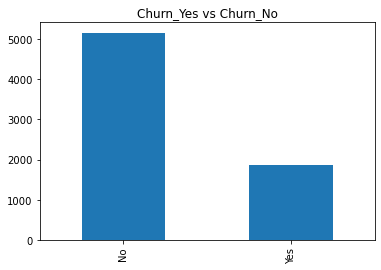

In [19]:
df['Churn'].value_counts().plot(kind='bar')
plt.title("Churn_Yes vs Churn_No")

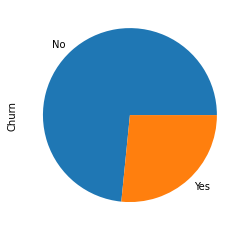

In [20]:

df["Churn"].value_counts().plot(kind='pie', subplots=True)
plt.savefig('pie.png')

26.6% of the people in the dataset churned. This represents customers who will ideally be targeted for customer retention programs.

# Discrete Feature Exploration
We plot and examine histograms of the numerical fields to get an idea of the distributions, and identify any possible patterns. We start by exploring the proportion of members churning within each feature.

Text(0.5, 1.0, 'SeniorCitizen Class Proportions')

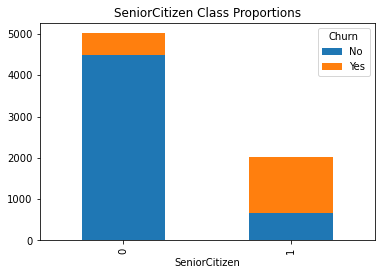

In [27]:
cat  ="Churn"
feature = 'SeniorCitizen'

df_plot = df.groupby([cat, feature]).size().reset_index().pivot(columns=cat, index=feature, values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("SeniorCitizen Class Proportions")

Text(0.5, 1.0, 'PaymentMethod Class Proportions')

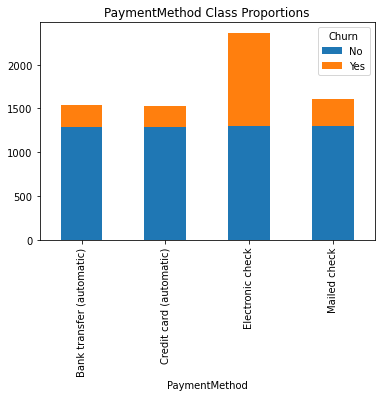

In [28]:
cat  ="Churn"
feature = 'PaymentMethod'

df_plot = df.groupby([cat, feature]).size().reset_index().pivot(columns=cat, index=feature, values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title(feature + " Class Proportions")

Text(0.5, 1.0, 'InternetService Class Proportions')

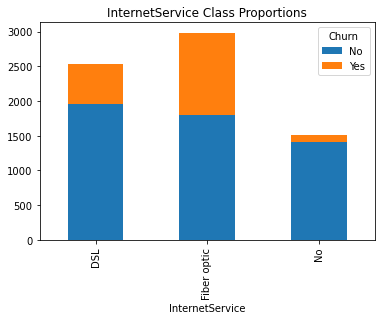

In [29]:
cat  ="Churn"
feature = 'InternetService'

df_plot = df.groupby([cat, feature]).size().reset_index().pivot(columns=cat, index=feature, values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title(feature + " Class Proportions")

Text(0.5, 1.0, 'Contract Class Proportions')

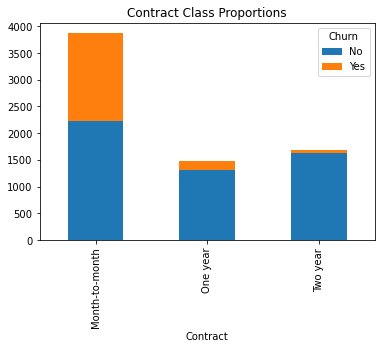

In [30]:
cat  ="Churn"
feature = 'Contract'

df_plot = df.groupby([cat, feature]).size().reset_index().pivot(columns=cat, index=feature, values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title(feature + " Class Proportions")

Text(0.5, 1.0, 'DeviceProtection Class Proportions')

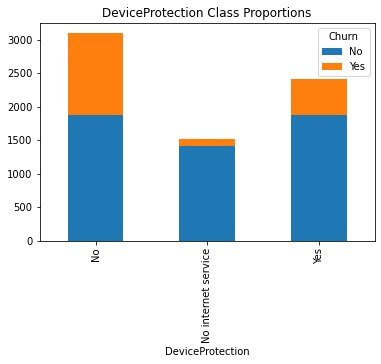

In [31]:
cat  ="Churn"
feature = "DeviceProtection"

df_plot = df.groupby([cat, feature]).size().reset_index().pivot(columns=cat, index=feature, values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title(feature + " Class Proportions")

Text(0.5, 1.0, 'StreamingMovies Class Proportions')

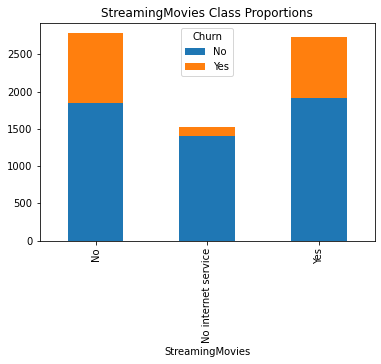

In [32]:
cat  ="Churn"
feature = "StreamingMovies"

df_plot = df.groupby([cat, feature]).size().reset_index().pivot(columns=cat, index=feature, values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title(feature + " Class Proportions")

Text(0.5, 1.0, 'StreamingTV Class Proportions')

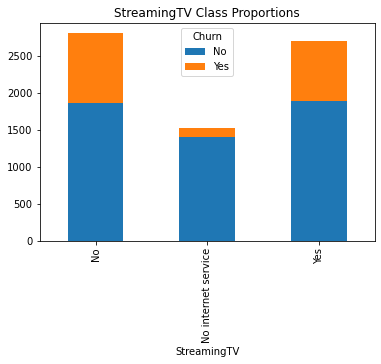

In [33]:
cat  ="Churn"
feature = "StreamingTV"

df_plot = df.groupby([cat, feature]).size().reset_index().pivot(columns=cat, index=feature, values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title(feature + " Class Proportions")

Text(0.5, 1.0, 'OnlineSecurity Class Proportions')

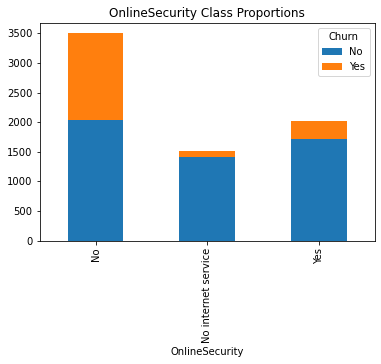

In [34]:
cat  ="Churn"
feature = "OnlineSecurity"

df_plot = df.groupby([cat, feature]).size().reset_index().pivot(columns=cat, index=feature, values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title(feature + " Class Proportions")

Text(0.5, 1.0, 'OnlineBackup Class Proportions')

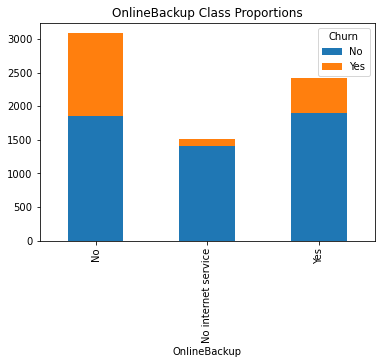

In [35]:
cat  ="Churn"
feature = "OnlineBackup"

df_plot = df.groupby([cat, feature]).size().reset_index().pivot(columns=cat, index=feature, values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title(feature + " Class Proportions")

## Observations:

- Senior citizens, those that pay by electronic check and those on a monthly contract had a very high rate of churning
- Those with a fibre optic internet connection were more likely to churn than DSL, and much more than with no internet connection. 
- Those with no internet service had a low proportion of churn.
- Of those with a connection, the ones with no online security and backup were significantly more likely to churn. Members with a streaming service (TV or Movies) were slightly more likely to churn.

## Notes

While a high proportion of senior citizens churned, using features that relate to demographic and gender may cause the model to discriminate against certain groups of individuals, therefore may violate ethical principles. It is our responsibility as data scientists to ensure that our models comply with ethical principles.



# Continuous feature Exploration
We continue by plotting some histograms and violin plots to visualise the distributions of separate features.

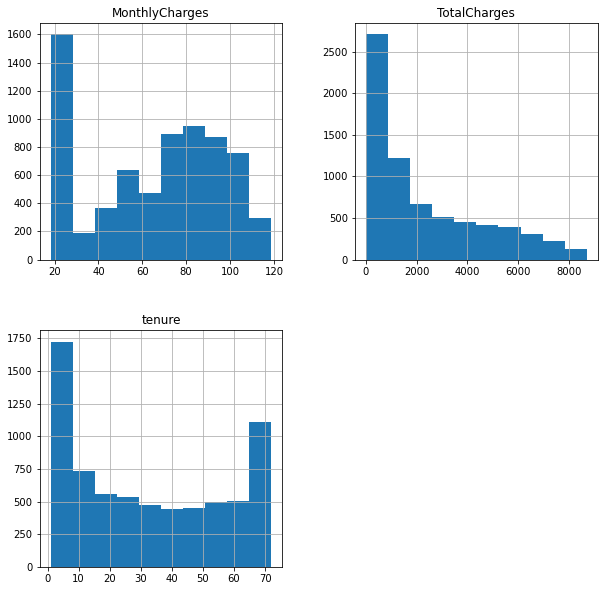

In [37]:
df[["MonthlyCharges", "tenure", "TotalCharges"]].hist(bins=10, figsize=(10,10))
plt.show()

Text(0.5, 1.0, 'tenure')

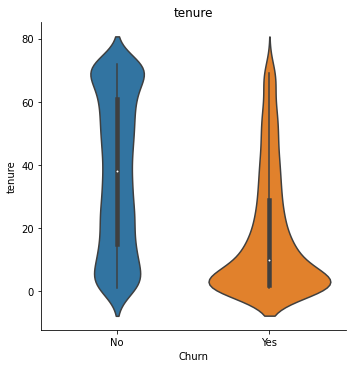

In [38]:
feature = 'tenure'

sns.catplot(kind='violin', data=df, y=feature, x="Churn")
plt.savefig('plot.png')
plt.title(feature)

Text(0.5, 1.0, 'tenure vs. Churn')

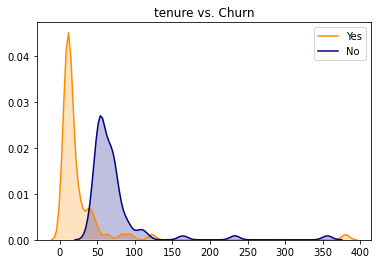

In [39]:
cat  ="Churn"
feature = "tenure"

df_plot = df.groupby([cat, feature]).size().reset_index().pivot(columns=cat, index=feature, values=0)

p1=sns.kdeplot(df_plot['Yes'], shade=True, color="darkorange")
p1=sns.kdeplot(df_plot['No'], shade=True, color="navy")
plt.title(feature + " vs. Churn")

Text(0.5, 1.0, 'MonthlyCharges')

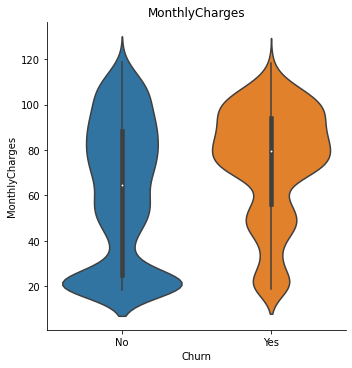

In [40]:
feature = 'MonthlyCharges'

sns.catplot(kind='violin', data=df, y=feature, x='Churn')
plt.savefig('plot.png')
plt.title(feature)

Text(0.5, 1.0, 'TotalCharges')

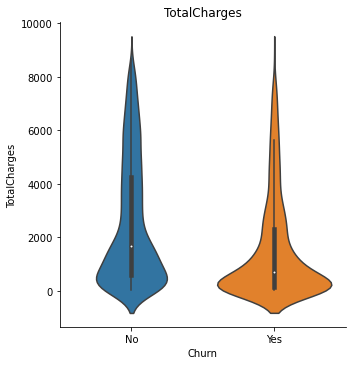

In [41]:
feature = 'TotalCharges'

sns.catplot(kind='violin', data=df, y=feature, x='Churn')
plt.savefig('plot.png')
plt.title(feature)

## Observations
The violin plots demonstrate the difference in distribution of the numerical features between churn and no churn (especially with MonthlyCharges and tenure).

- Members with higher monthly charges, or with a lower tenure look more likely to churn
- This is to be expected, as we would expect more loyal customers to be less likely to leave the business. 
- If customers are paying a large bill each month they are more likely to churn in an effort to cut their cost.


# Feature Selection
An important part of data pre-processing is selecting which features to input into the model as noisy and correlated data will cause poor model performance. Removing redundant data improves the training of the model and improves processing time, and is the essence of dimensionality reduction. Features which are correlated with each other can be removed from the dataset as these contain redundant information. These are easily found using the correlation heatmap (below). 

## Analyse Feature Correlations
We are now ready to visualise some of the data. We will begin by creating a correlation matrix of the target variable with respect to each other feature in the dataset. Listed below are these correlations and their absolute values, ordered by strength of correlation in descending order.

In [42]:
# Generate matrix of correlations 
corr_matrix = df3.corr()

# Create a dataframe of correlations and absolute correlations with respect to response "Churn_yes" listed in order of strongest to weakest.
print('\nAbsolute Correlations with "Churn_Yes":\n')  
y = "Churn_Yes"
df_corr = pd.DataFrame({'corr':corr_matrix[y], 'abs_corr': abs(corr_matrix[y])})
df_corr = df_corr.sort_values(by='abs_corr', ascending=False)                   
print(df_corr)
df_corr.to_csv('feature_correlations.csv', index=True)



Absolute Correlations with "Churn_Yes":

                                           corr  abs_corr
Churn_Yes                              1.000000  1.000000
SeniorCitizen                          0.580023  0.580023
tenure                                -0.354049  0.354049
Contract_Two year                     -0.301552  0.301552
PaymentMethod_Electronic check         0.301455  0.301455
InternetService_Fiber optic            0.255256  0.255256
InternetService_No                    -0.231985  0.231985
DeviceProtection_No internet service  -0.227578  0.227578
OnlineBackup_No internet service      -0.227578  0.227578
StreamingMovies_No internet service   -0.227578  0.227578
StreamingTV_No internet service       -0.227578  0.227578
TechSupport_No internet service       -0.227578  0.227578
OnlineSecurity_No internet service    -0.227578  0.227578
TotalCharges                          -0.199484  0.199484
MonthlyCharges                         0.192858  0.192858
PaperlessBilling_Yes          

A worthwhile observation is that there are many features which now have a No internet service dummy variable. These feature fields are duplicates and therefore redundant data which will not provide any new information. It would be appropriate to remove the duplicates and leave in one as inputs to the model. Removing redundant data will improve processing and simplify the input dataset.

## Visualise Feature Correlations
We can more easily interpret this with a visualisation. We plot the correlations between the features in the dataset and our target variable "Churn_Yes".

Correlation bar-plot saved as: feature_correlations.png.


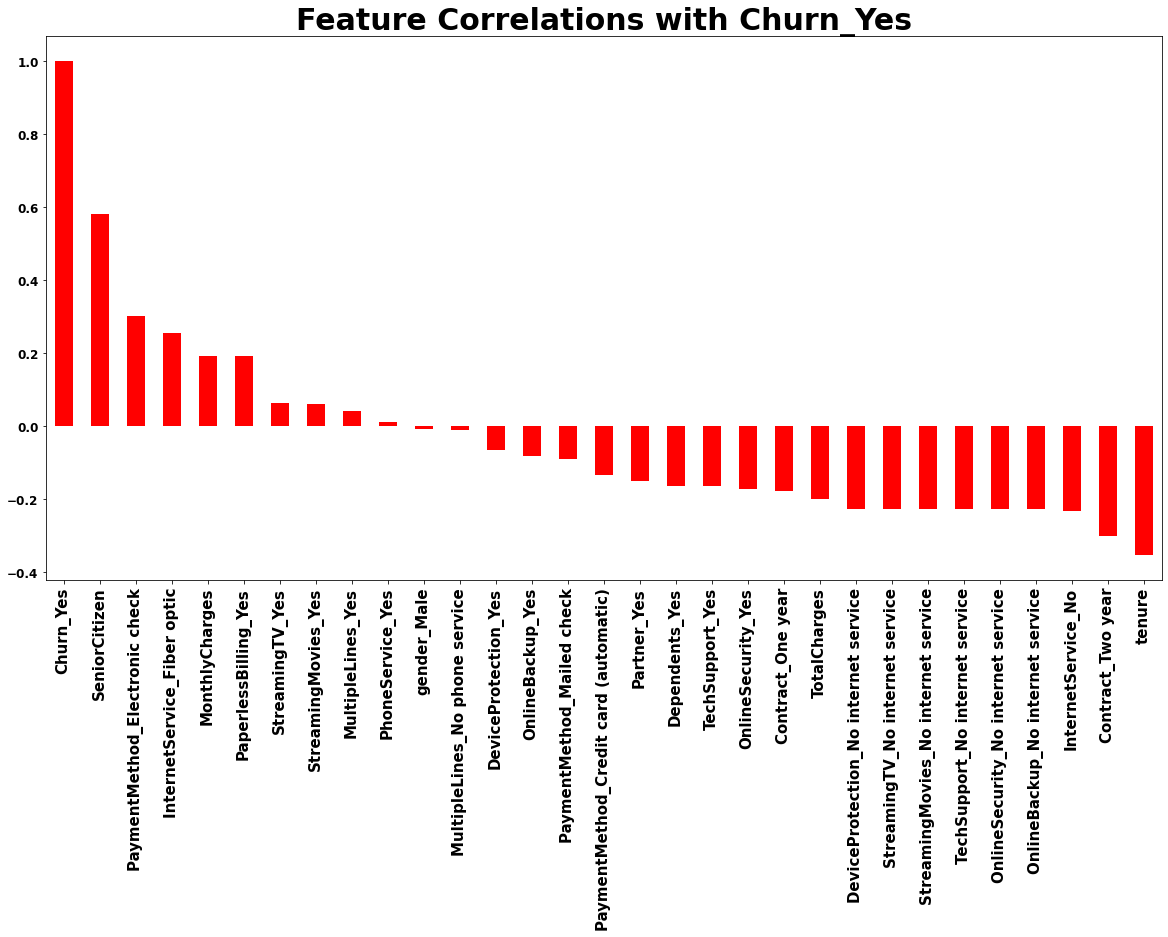

In [46]:
# Plot correlations between our features and our target feature, churn, as a bar plot, 
# sort by descending order
plot_title = "Feature Correlations with Churn_Yes"
df3.corr()[y].sort_values(ascending = False).plot.bar(figsize = (20, 10), color = 'Red')
plt.title(plot_title, fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.savefig('feature_correlations.png')
#plt.tight_layout()
print("Correlation bar-plot saved as: feature_correlations.png.")

There are a few attributes exhibiting stronger correlations with churn (such as SeniorCitizen and tenure), which will help indicate which features may be useful inputs in a computational model. Another way of visualising correlations is by plotting a correlation heatmap.

Correlation heatmap saved as: feature_heatmap.png.


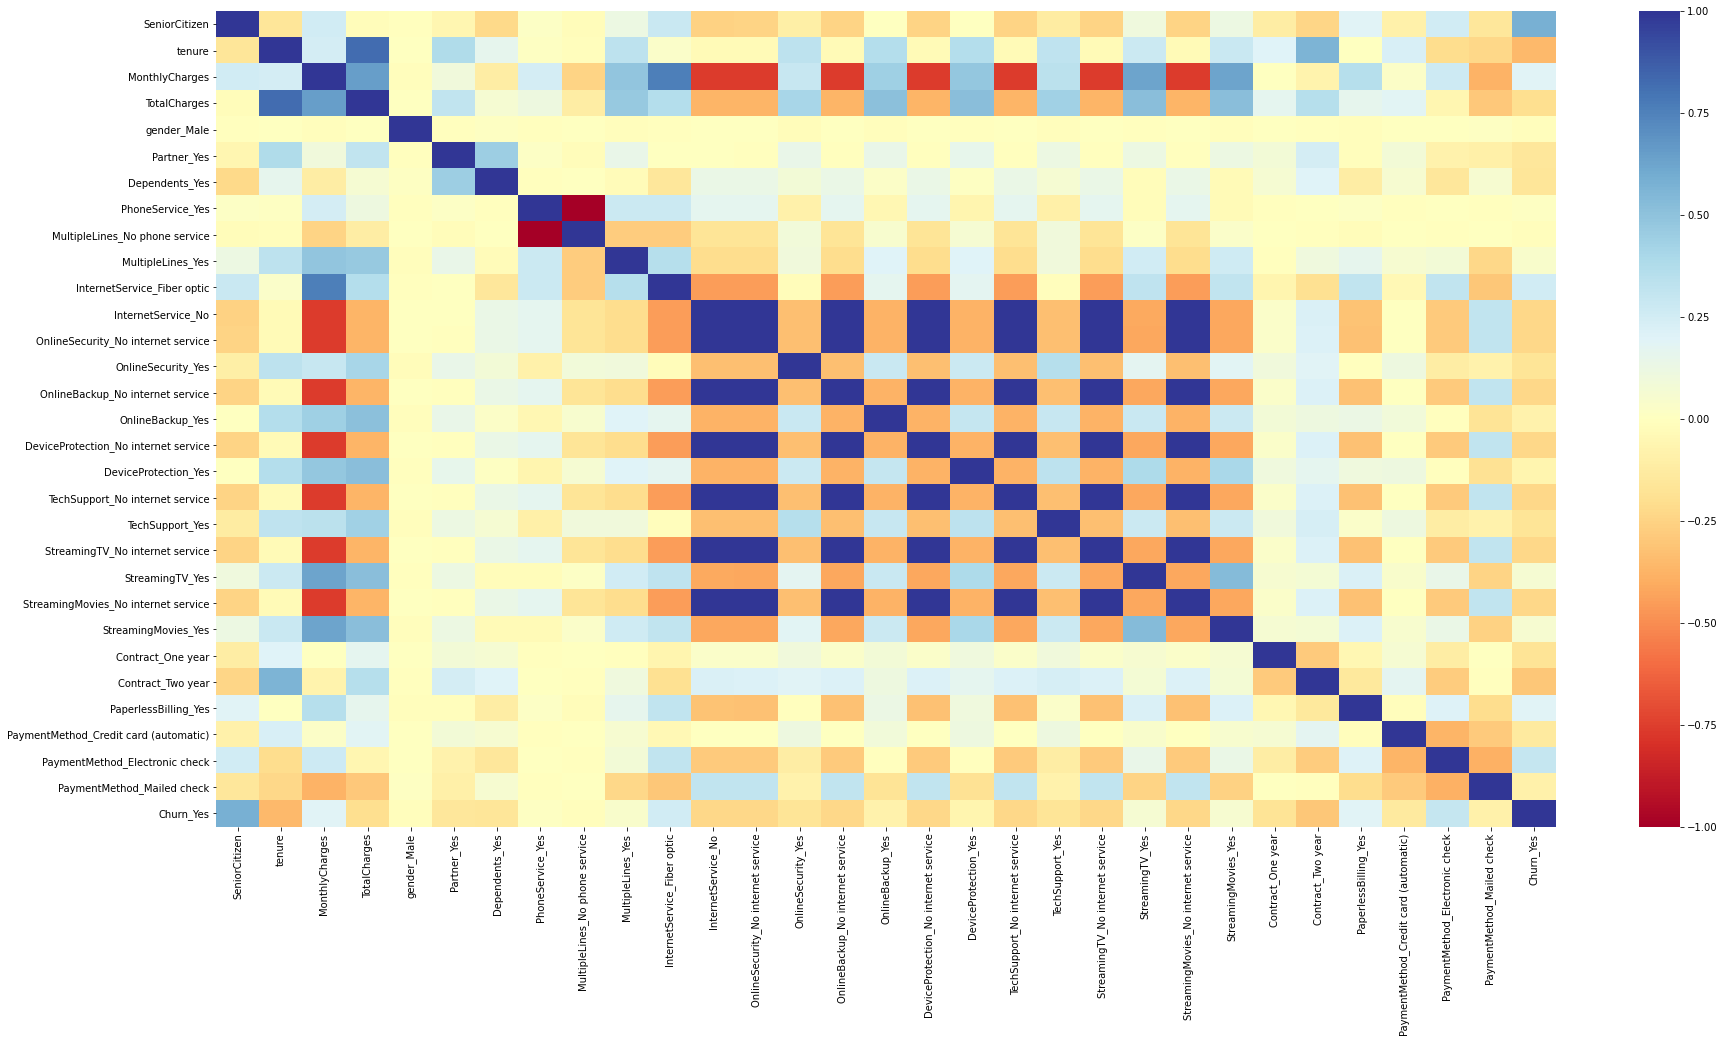

In [47]:
# Generate heatmap of features
plt.figure(figsize = (30, 15))
sns.heatmap(df3.corr(), cmap = 'RdYlBu')
plt.savefig('feature_heatmap.png')
print("Correlation heatmap saved as: feature_heatmap.png.")

Our primary objective is removing inter-correlated features. After analysing the heatmap, the following were discovered.

- All fields that signify “no internet service” could be omitted. These fields were created as dummy variables and represent an overlap in the categorical features, therefore data redundancy. They have perfect/very high positive correlation with each other and also have a strong negative correlation with MonthlyCharges (expected).
- multiple_lines_no phone service and phone_service_yes have perfect negative correlation, therefore could also be removed. 

## Features Removed:

- OnlineBackup_No internet service
- DeviceProtection_No internet service
- StreamingMovies_No internet service
- StreamingTV__No internet service
- TechSupport_No internet service
- OnlineSecurity_No internet service
- InternetService_No
- MultipleLines_No phone service


We can now create a new correlation matrix with the redundant features removed.


In [60]:
# Create new dataframe removing the above features.
df4 = df3.drop(["OnlineBackup_No internet service", "DeviceProtection_No internet service", "StreamingMovies_No internet service", "StreamingTV_No internet service", "TechSupport_No internet service", "OnlineSecurity_No internet service", "MultipleLines_No phone service", "InternetService_No"], inplace=False, axis=1)

# Generate new matrix of correlations 
corr_matrix2 = df4.corr()

# Create a dataframe of correlations and absolute correlations with respect to response "Churn_yes" listed in order of strongest to weakest.
print('\nAbsolute Correlations with "Churn_Yes":\n')  
y = "Churn_Yes"
df_corr2 = pd.DataFrame({'corr':corr_matrix2[y], 'abs_corr': abs(corr_matrix2[y])})
df_corr2 = df_corr2.sort_values(by='abs_corr', ascending=False)                   
print(df_corr2)


Absolute Correlations with "Churn_Yes":

                                           corr  abs_corr
Churn_Yes                              1.000000  1.000000
SeniorCitizen                          0.580023  0.580023
tenure                                -0.354049  0.354049
Contract_Two year                     -0.301552  0.301552
PaymentMethod_Electronic check         0.301455  0.301455
InternetService_Fiber optic            0.255256  0.255256
TotalCharges                          -0.199484  0.199484
MonthlyCharges                         0.192858  0.192858
PaperlessBilling_Yes                   0.191454  0.191454
Contract_One year                     -0.178225  0.178225
OnlineSecurity_Yes                    -0.171270  0.171270
TechSupport_Yes                       -0.164716  0.164716
Dependents_Yes                        -0.163128  0.163128
Partner_Yes                           -0.149982  0.149982
PaymentMethod_Credit card (automatic) -0.134687  0.134687
PaymentMethod_Mailed check    

We follow by plotting a new bar plot and heatmap.

Correlation bar-plot saved as: feature_correlations.png.


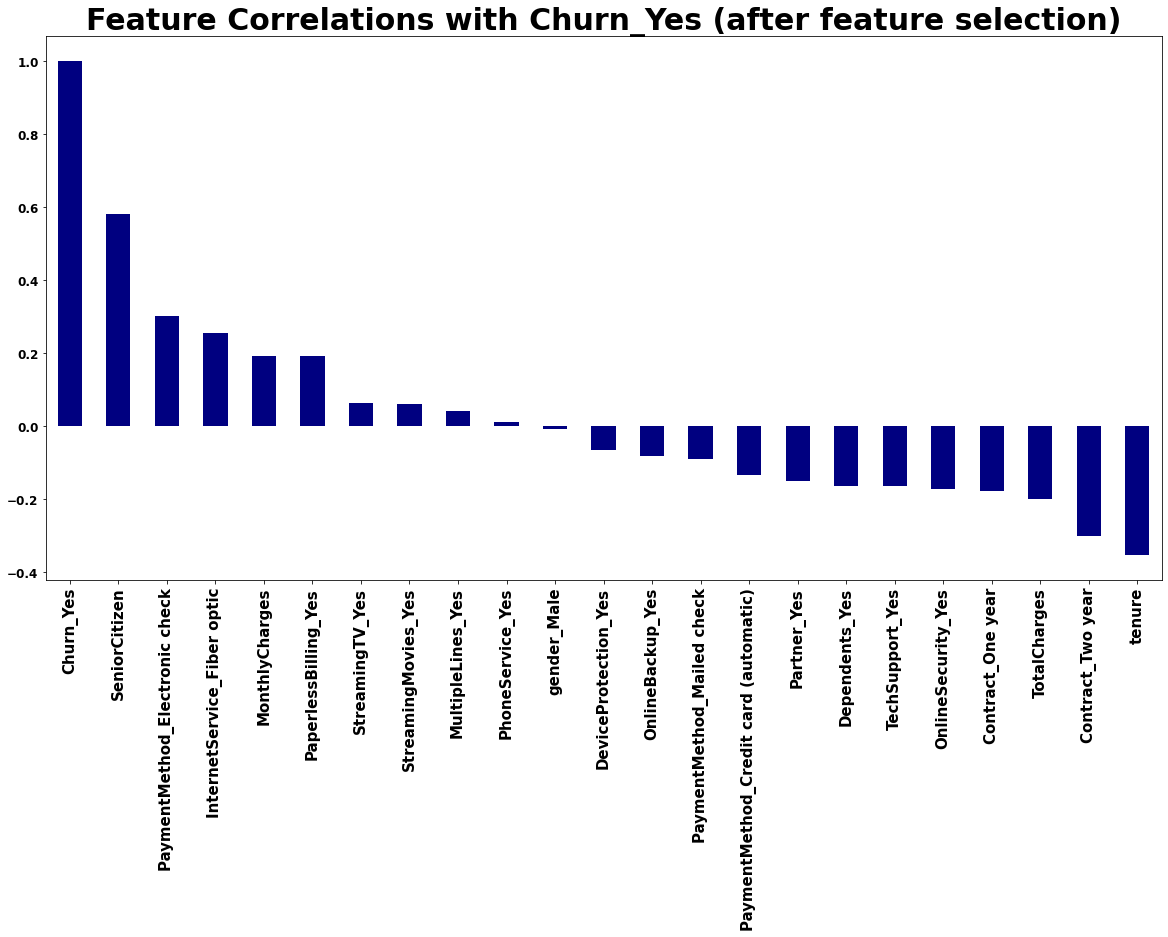

In [57]:
# Plot correlations between our features and our target feature, churn, as a bar plot, 
# sort by descending order
plot_title = "Feature Correlations with Churn_Yes (after feature selection)"
df4.corr()[y].sort_values(ascending = False).plot.bar(figsize = (20, 10), color = 'Navy')
plt.title(plot_title, fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.savefig('feature_correlations.png')
#plt.tight_layout()
print("Correlation bar-plot saved as: feature_correlations.png.")

Correlation heatmap saved as: feature_heatmap.png.


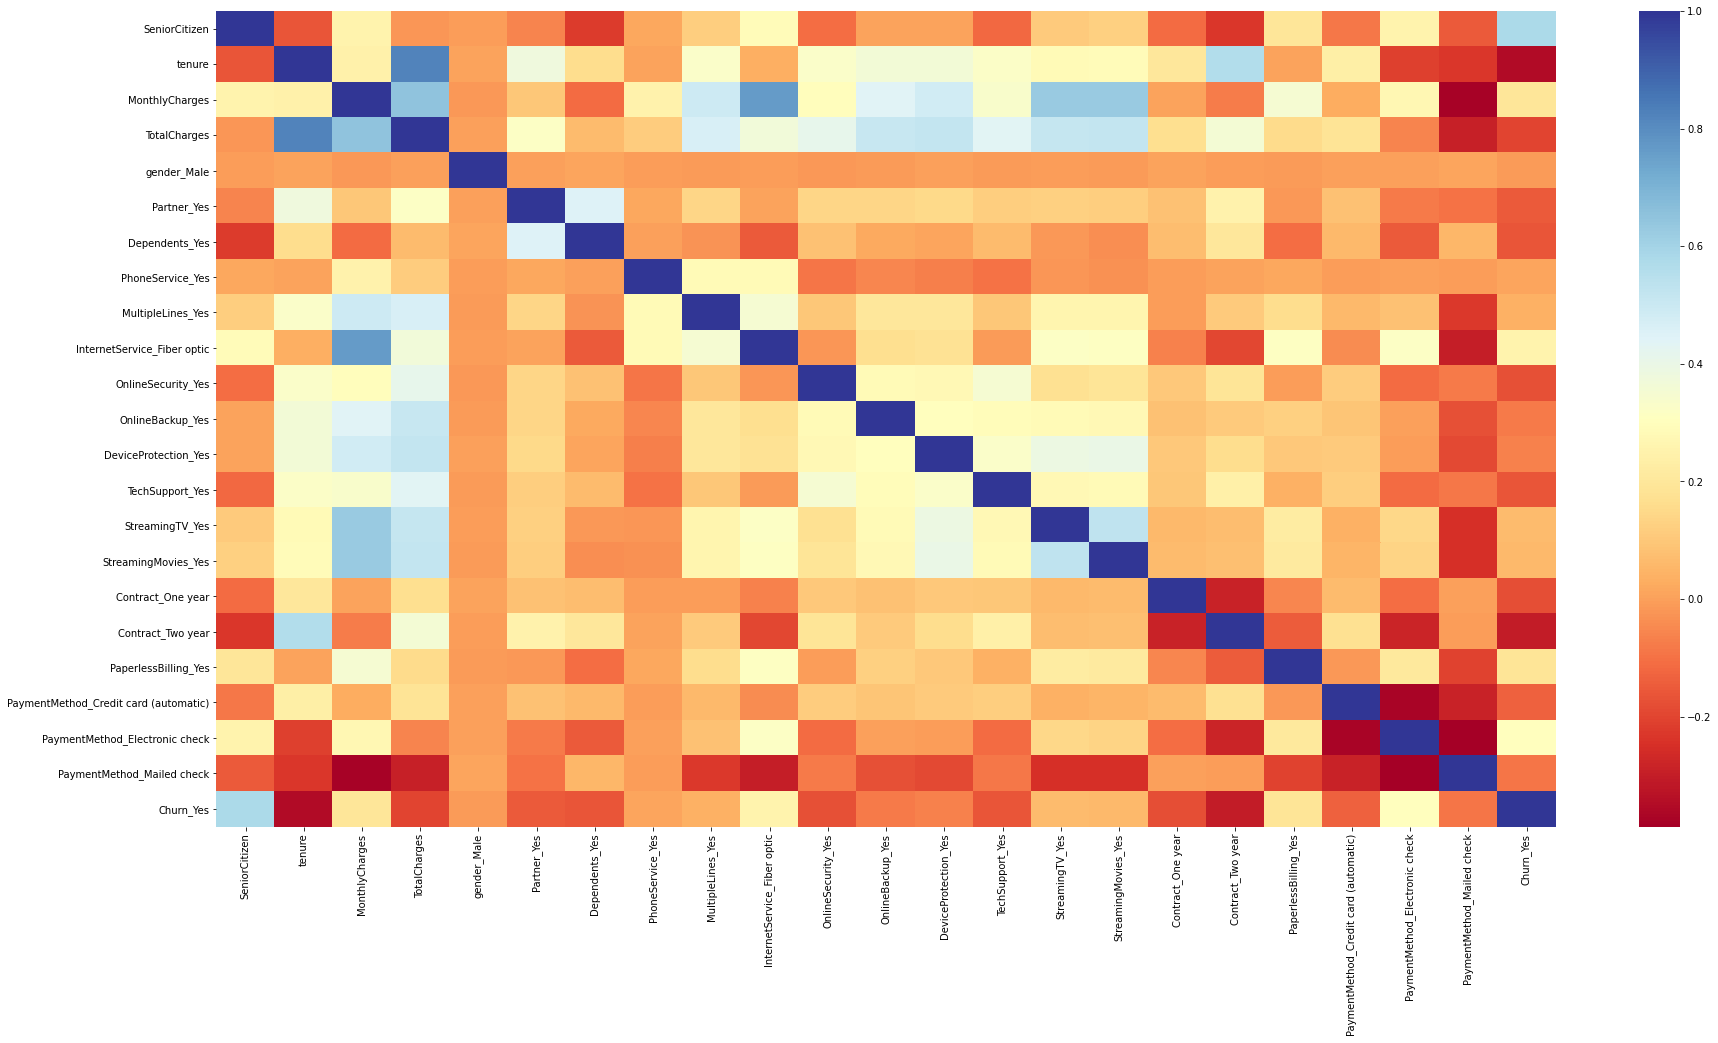

In [58]:
# Generate new correlation heatmap of features
plt.figure(figsize = (30, 15))
sns.heatmap(df4.corr(), cmap = 'RdYlBu')
plt.savefig('feature_heatmap.png')
print("Correlation heatmap saved as: feature_heatmap.png.")

Removing the correlated features, the heatmap looks much better, with the limits of correlation values less extreme.

# Pre-Processing

We now continue to prepare the data for input into our models. The following pre=processing tasks were carried out:

The following other data pre-processing was carried out:
- Records with null values were dropped
- customerID feature was removed (Identifier not useful for computational model).
- Churn_yes was identified as the target.
- Data saved as a two csv files, one representing the feature dataframe frame and one representing the target dataframe.


In [65]:
# Remove unecessary columns
df2 = df.iloc[:,1:]

# Remove records with N/A values
df2.dropna(inplace=True)
df2.head()

# Replace churn string values with numeric binary values
df3 = pd.get_dummies(df2, drop_first=True)

# Save final dataframe to CSV
df3.to_csv('data_processed.csv', index=False)

#Establish Feature Frame

# Final list of features
feature_frame = df3[[
"SeniorCitizen",
"TotalCharges",
"MonthlyCharges",
"tenure",
"PaymentMethod_Electronic check",
"Contract_Two year",
"InternetService_Fiber optic",
"gender_Male",
"PaperlessBilling_Yes",
"TechSupport_Yes",
"Partner_Yes",
"OnlineBackup_Yes",
"Contract_One year",
"OnlineSecurity_Yes",
"DeviceProtection_Yes",
"MultipleLines_Yes",
"Dependents_Yes",
"StreamingMovies_Yes",
"StreamingTV_Yes",
"PaymentMethod_Credit card (automatic)",
"PaymentMethod_Mailed check", "PhoneService_Yes"
]]

# Establish 'Churn' as the target feature
target_frame = df3.iloc[:,-1]

# Save feature frame and target frames to csv
feature_frame.to_csv('feature_frame.csv', index=False)
target_frame.to_csv('target_frame.csv', index=False)


The exported files are now ready for input into a model